In [42]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam,SGD   
from keras.datasets import fashion_mnist,cifar100
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import regularizers

In [43]:
#load data
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 213s 1us/step


In [44]:
#normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [45]:
#to categorical
print(f"before label is {y_train[0]}")
y_train = to_categorical(y_train)
print(f"after label is {y_train[0]}")
y_test = to_categorical(y_test)

before label is [19]
after label is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


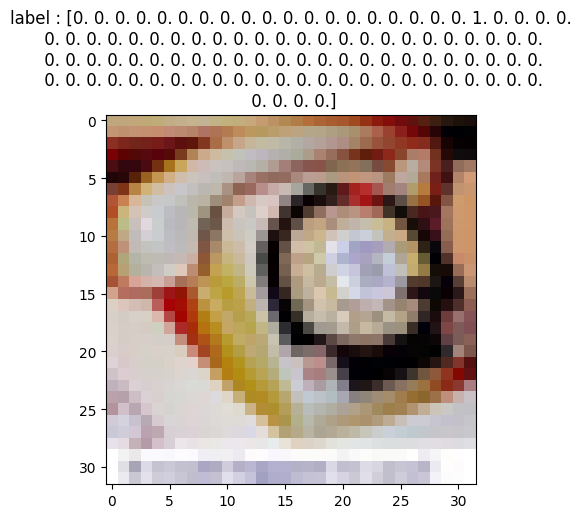

In [46]:
#visulaise the dataset
plt.imshow(x_train[5],cmap='gray')
plt.title(f"label : {y_train[0]}")
plt.show()

In [63]:
#architecture of model
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,'relu'))
model.add(Dense(256,'relu'))
model.add(Dense(128,'relu'))
model.add(Dense(64,'relu'))
model.add(Dense(100,'softmax'))       #100 neurons last layer


/home/praneeth/Documents/Super60/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
#compile 
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
#train model
result = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.0599 - loss: 4.1442 - val_accuracy: 0.0819 - val_loss: 3.9952
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1011 - loss: 3.8680 - val_accuracy: 0.1267 - val_loss: 3.7478
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1288 - loss: 3.7029 - val_accuracy: 0.1283 - val_loss: 3.7096
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1495 - loss: 3.5807 - val_accuracy: 0.1575 - val_loss: 3.5897
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1645 - loss: 3.4985 - val_accuracy: 0.1601 - val_loss: 3.5219
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1753 - loss: 3.4303 - val_accuracy: 0.1768 - val_loss: 3.4897
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1866 - loss: 3.3727 - val_accuracy: 0.1817 - val_loss: 3.4529
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1949 - los

In [70]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1935 - loss: 3.4074
test loss:3.4073612689971924
test accuracy:0.19349999725818634


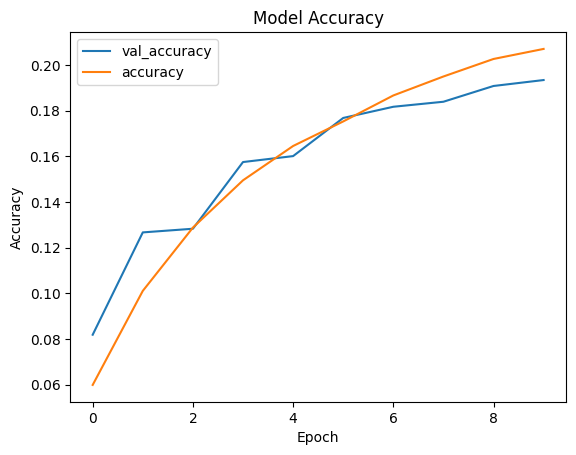

In [71]:
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.plot(result.history['accuracy'] ,label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 2 with L2 regulariser (1e-4) and drop out 


In [76]:
#architecture of model
model_le4 = Sequential()
model_le4.add(Flatten(input_shape=(32,32,3)))
model_le4.add(Dense(1024,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(512,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(100,'softmax'))       #10 neurons last layer


/home/praneeth/Documents/Super60/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
#compile 
model_le4.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
#train
result_le4 = model_le4.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.0294 - loss: 4.5731 - val_accuracy: 0.0515 - val_loss: 4.2368
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.0728 - loss: 4.0843 - val_accuracy: 0.0921 - val_loss: 3.9859
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.0972 - loss: 3.9353 - val_accuracy: 0.1050 - val_loss: 3.9089
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.1175 - loss: 3.8049 - val_accuracy: 0.1251 - val_loss: 3.8193
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.1373 - loss: 3.7115 - val_accuracy: 0.1253 - val_loss: 3.8233
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.1519 - loss: 3.6263 - val_accuracy: 0.1436 - val_loss: 3.6975
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.1604 - loss: 3.5615 - val_accuracy: 0.1529 - val_loss: 3.6247
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.1731 - loss: 3.5015 - va

In [79]:
#evaluate
loss,accuracy = model_le4.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1843 - loss: 3.4948
test loss:3.4947941303253174
test accuracy:0.1843000054359436


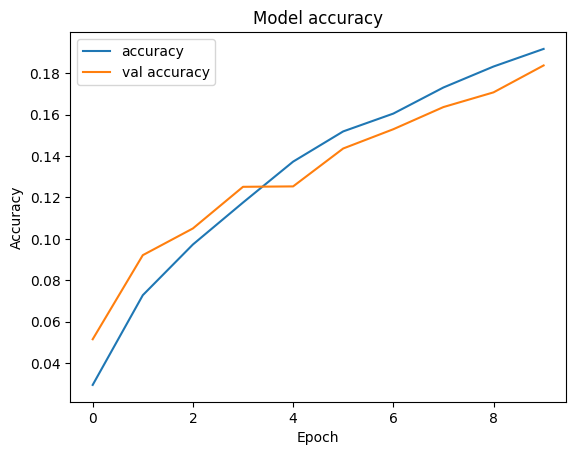

In [ ]:
plt.plot(result_le4.history['accuracy'],label='accuracy')
plt.plot(result_le4.history['val_accuracy'],label='val accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()